<a href="https://colab.research.google.com/github/sreejithvn/zero-shot-classification-for-long-text/blob/main/0__Preprocessing_Dataset_Saved_20_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/MSC_Project/Jan2020Frontiers.jsonl', lines=True)

In [ ]:
df.head()

,id,text,journal
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology


In [ ]:
df['journal'].value_counts().head(60)

Frontiers in Microbiology                           238
Frontiers in Psychology                             222
Frontiers in Immunology                             184
Frontiers in Pharmacology                           173
Frontiers in Plant Science                          145
Frontiers in Oncology                               131
Frontiers in Physiology                             105
Frontiers in Genetics                                99
Frontiers in Neuroscience                            89
Frontiers in Psychiatry                              86
Frontiers in Neurology                               76
Frontiers in Chemistry                               69
Frontiers in Marine Science                          64
Frontiers in Bioengineering and Biotechnology        56
Frontiers in Endocrinology                           53
Frontiers in Cell and Developmental Biology          47
Frontiers in Cellular and Infection Microbiology     46
Frontiers in Veterinary Science                 

In [ ]:
df['journal'].value_counts().tail(6)

Frontiers in Synaptic Neuroscience             2
Frontiers in Medical Technology                1
Frontiers in Computer Science                  1
Frontiers in Research Metrics and Analytics    1
Frontiers in Agronomy                          1
Frontiers in Genome Editing                    1
Name: journal, dtype: int64

In [ ]:
len(df['journal'].value_counts())

64

# Create the label column by removing the first 2 words from each journal tag

In [ ]:
df['label'] = df['journal'].apply(lambda x: (' ').join(x.split()[2:]))

In [ ]:
df['label']

0            Medicine
1            Genetics
2          Psychology
3            Genetics
4       Endocrinology
            ...      
2523         Oncology
2524         Oncology
2525        Materials
2526    Endocrinology
2527         Big Data
Name: label, Length: 2528, dtype: object

In [ ]:
df.head()

,id,text,journal,label
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,Medicine
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,Genetics
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,Psychology
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,Genetics
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,Endocrinology


In [ ]:
# list(df.label.unique())

# Removing samples with count less than 25 and more than 125

- less than 25 -> so minimum 2 samples in test dataset after 8:1:1 train, validation, test split

In [ ]:
df_20 = df.groupby('label').filter(lambda x : len(x)<125)
df_20 = df_20.groupby('label').filter(lambda x : len(x)>25)

In [ ]:
# df_35 = df.groupby('label').filter(lambda x : len(x)<125)
# df_35 = df_35.groupby('label').filter(lambda x : len(x)>9)

In [ ]:
df_20['label'].value_counts()

Physiology                             105
Genetics                                99
Neuroscience                            89
Psychiatry                              86
Neurology                               76
Chemistry                               69
Marine Science                          64
Bioengineering and Biotechnology        56
Endocrinology                           53
Cell and Developmental Biology          47
Cellular and Infection Microbiology     46
Veterinary Science                      45
Medicine                                44
Pediatrics                              43
Physics                                 35
Ecology and Evolution                   34
Public Health                           29
Aging Neuroscience                      29
Earth Science                           26
Cellular Neuroscience                   26
Name: label, dtype: int64

In [ ]:
df_20['label'].value_counts().index

Index(['Physiology', 'Genetics', 'Neuroscience', 'Psychiatry', 'Neurology',
       'Chemistry', 'Marine Science', 'Bioengineering and Biotechnology',
       'Endocrinology', 'Cell and Developmental Biology',
       'Cellular and Infection Microbiology', 'Veterinary Science', 'Medicine',
       'Pediatrics', 'Physics', 'Ecology and Evolution', 'Public Health',
       'Aging Neuroscience', 'Earth Science', 'Cellular Neuroscience'],
      dtype='object')

In [ ]:
len(df), len(df_20)

(2528, 1101)

In [ ]:
len(list(df_20.label.unique()))

20

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})

## Distribution of Labels (topics)

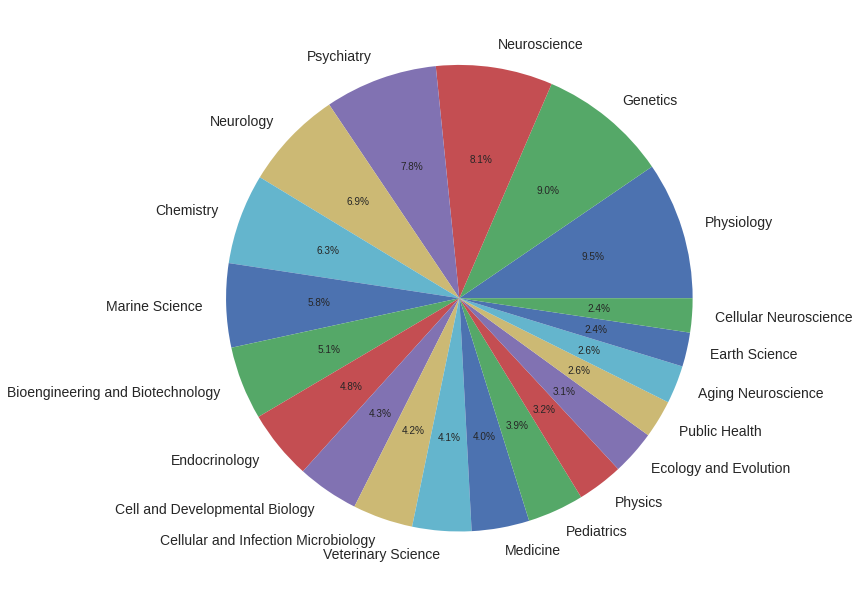

In [ ]:
plt.figure(figsize=(10,10))
# plt.rc('axes', titlesize=16)

plt.pie(df_20['label'].value_counts(), labels=df_20['label'].value_counts().index, autopct='%1.1f%%')
# plt.title ('Distribution of labels in Labels')
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)  
plt.show()

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

## Distribution of token length of articles

In [ ]:
token_length = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))
token_length

0       10073
1       12873
2        8505
3       53896
4       22908
        ...  
2523     6333
2524    10602
2525    13522
2526    11806
2527     7783
Name: text, Length: 2528, dtype: int64

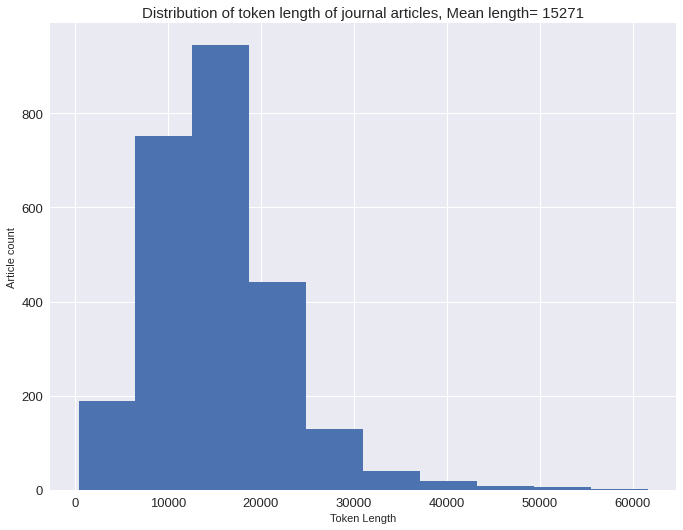

In [ ]:
plt.style.use('seaborn')
plt.rc('axes', titlesize=15)
plt.figure(figsize=(10,8))
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)

plt.hist(token_length)
plt.title('Distribution of token length of journal articles, Mean length= {0}'.format(int(np.mean(token_len))))
plt.ylabel('Article count')
plt.xlabel('Token Length');

In [ ]:
np.mean(token_length)

15271.214003164558

In [ ]:
df.head()

,id,text,journal,label
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,Medicine
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,Genetics
2,482500,\n Relationship Between SES and Academic Achie...,Frontiers in Psychology,Psychology
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,Genetics
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,Endocrinology


# Preprocess Text

In [ ]:
def text_preprocessing(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)                 # remove text in brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)   # remove url links
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)                      # remove new line character
    text = re.sub('\|', '', text)                      # remove '|' character
    text = re.sub('\w*\d\w*', '', text)                # remove words containing digits
    text.encode('ascii', 'ignore').decode('ascii')
    text = text.strip()  
    text = re.sub(r'\s+',' ',text)                     # replace mutiple space with single space
    return text

In [ ]:
df_20['clean_text'] = df_20['text'].apply(lambda x: text_preprocessing(x))

In [ ]:
df_20.head()

,id,text,journal,label,clean_text
0,465950,\n Sleep Characteristics and Influencing Facto...,Frontiers in Medicine,Medicine,sleep characteristics and influencing factors ...
1,483526,A Hybrid Approach for Modeling Type 2 Diabetes...,Frontiers in Genetics,Genetics,a hybrid approach for modeling type diabetes m...
3,437333,Environmental Health Research in Africa: Impor...,Frontiers in Genetics,Genetics,environmental health research in africa: impor...
4,486515,"\n 3,5-T2—A Janus-Faced Thyroid Hormone Metabo...",Frontiers in Endocrinology,Endocrinology,",-—a janus-faced thyroid hormone metabolite ex..."
6,488364,\n Differential Regulation of LPS-Mediated VE-...,Frontiers in Cell and Developmental Biology,Cell and Developmental Biology,differential regulation of lps-mediated ve-cad...


# Dataset saved with 20 labels

In [ ]:
df_20.to_json('/content/gdrive/MyDrive/Colab Notebooks/MSC_Project/Jan2020Frontiers_20_labels.jsonl', orient='records', lines=True)